In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [16]:
a = float(input("Input a:"))
b = float(input("Input b:"))

Input a:10
Input b:2


In [3]:
t =(math.sqrt(5)-1) / 2 #invphi

In [17]:
def  fx(x):
    return a*x+b/np.exp(x)

In [18]:
def dfx(x):
    return a-b/np.exp(x)

In [19]:
def GoldenSectionSearchMethod(fx,lp,rp,epsilon):
    
    '''
     Parameters:
     fx: target  function
     lp: left point
     rp: right point
     epsilon: precision
     return: minimum_point, minimum_value
    '''
    G = np.zeros((1000, 4))
    delta = rp - lp
    t = (math.sqrt(5)-1)/2
    x1 = lp + (1-t)*delta
    x2 = lp + t*delta
    fxx1 = fx(x1)
    fxx2 = fx(x2)
    k = 0
    G[k] = [lp,x1,x2,rp]
    while abs(rp-lp) > epsilon: 
        print("iteration",k)
        print(G[k])
        if fxx1 < fxx2:
            rp=x2
            x2 = x1
            fxx2 = fxx1
            x1 = lp + (1-t)*(rp-lp)
            fxx1 = fx(x1)
        else:
            lp = x1
            x1 = x2
            fxx1 = fxx2
            x2=lp+t*(rp-lp)
            fxx2=fx(x2)
        k = k + 1
        G[k] = lp, x1, x2, rp
    min_point = (x1+x2)/2
    min_value = fx(min_point)
    return min_value, min_point,G[k]


def GoldenSearchRecursiveMethod(fx,lp,x1,x2,rp):
    y1 = fx(x1)
    y2 = fx(x2)
    if abs(rp-lp)<1e-5:
        return (x1+x2)/2
    if y1<y2:
        return GoldenSearchRecursiveMethod(fx,lp,lp+(1-t)*(x2-lp),lp+t*(x2-lp),x2)
    if y1>y2:
        return GoldenSearchRecursiveMethod(fx,x1, x1 + (1-t)*(rp - x1), x1 + t*(rp - x1),rp)
    if y1==y2:
        return GoldenSearchRecursiveMethod(fx,x1,x1+(1-t)*(x2-x1), x1+t*(x2-x1), x2)

In [20]:
min_value,min_point,_ = GoldenSectionSearchMethod(fx, float(-100), float(100), 1e-5)
print("min_value=%f, min_point=%f"% (min_value,min_point))
print("dfx(min_point)=",dfx(min_point))

iteration 0
[-100.          -23.60679775   23.60679775  100.        ]
iteration 1
[-23.60679775  23.60679775  52.7864045  100.        ]
iteration 2
[-23.60679775   5.572809    23.60679775  52.7864045 ]
iteration 3
[-23.60679775  -5.572809     5.572809    23.60679775]
iteration 4
[-5.572809    5.572809   12.46117975 23.60679775]
iteration 5
[-5.572809    1.31556175  5.572809   12.46117975]
iteration 6
[-5.572809   -1.31556175  1.31556175  5.572809  ]
iteration 7
[-5.572809   -2.9416855  -1.31556175  1.31556175]
iteration 8
[-2.9416855  -1.31556175 -0.310562    1.31556175]
iteration 9
[-2.9416855  -1.93668575 -1.31556175 -0.310562  ]
iteration 10
[-1.93668575 -1.31556175 -0.931686   -0.310562  ]
iteration 11
[-1.93668575 -1.55281001 -1.31556175 -0.931686  ]
iteration 12
[-1.93668575 -1.69943749 -1.55281001 -1.31556175]
iteration 13
[-1.69943749 -1.55281001 -1.46218924 -1.31556175]
iteration 14
[-1.69943749 -1.60881672 -1.55281001 -1.46218924]
iteration 15
[-1.69943749 -1.64343078 -1.6088

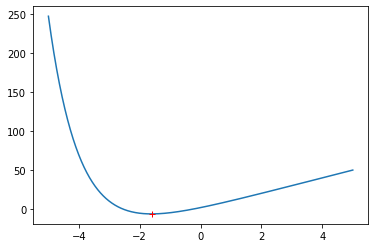

In [21]:
xaxis=np.linspace(-5,5,1000)
plt.plot(xaxis,fx(xaxis))
plt.plot(min_point,fx(min_point),'r+')
plt.show()

In [22]:
lp=float(-100)
rp=float(100)
x1=lp+(1-t)*(rp-lp)
x2=lp+t*(rp-lp)
x=GoldenSearchRecursiveMethod(fx,lp,x1,x2,rp)

In [23]:
print("min_value=%f, min_point=%f"% (fx(x),x))
print("dfx(min_point)=",dfx(x))

min_value=-6.094379, min_point=-1.609435
dfx(min_point)= 2.7208191436756124e-05


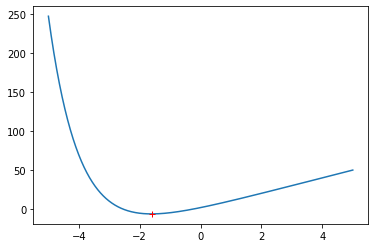

In [24]:
xaxis=np.linspace(-5,5,1000)
plt.plot(xaxis,fx(xaxis))
plt.plot(x,fx(x),'r+')
plt.show()

In [25]:
def DichotomyMethod(fx,lp,rp,epsilon,small):
    x1=(rp+lp)/2-small
    x2=(rp+lp)/2+small
    y1=fx(x1)
    y2=fx(x2)
#     print(x1,y1,x2,y2)
    if abs(rp-lp)<epsilon:
        return (x1+x2)/2
    if y1<y2:
        return DichotomyMethod(fx,lp,x2,epsilon,small)
    if y1>y2:
        return DichotomyMethod(fx,x1,rp,epsilon,small)
    if y1==y2:
        return (x1+x2)/2

In [26]:
x=DichotomyMethod(fx,float(-100),float(100),1e-5,1e-5)
print("min_value=%f, min_point=%f"% (fx(x),x))
print("dfx(min_point)=",dfx(x))

min_value=-6.094379, min_point=-1.609438
dfx(min_point)= 1.3108092389302328e-10


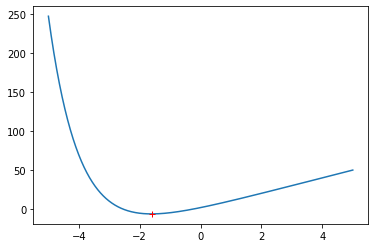

In [27]:
xaxis=np.linspace(-5,5,1000)
plt.plot(xaxis,fx(xaxis))
plt.plot(x,fx(x),'r+')
plt.show()